In [ ]:
!pip install finlab > log.txt

# 趨勢樣板條件

In [ ]:
from finlab import data

close = data.get('price:收盤價')

# 技術面選股(趨勢樣板)
cond1 = ((close > close.average(200)) & (close > close.average(150)))
cond2 = (close.average(150) > close.average(200))
cond3 = close.average(200) > close.average(200).shift(25)
cond4 = ((close.average(50) > close.average(200)) & (close.average(50) > close.average(150)))
cond5 = close > close.rolling(250).min()*1.25
cond6 = close > close.rolling(250).max()*0.75
rs = close / close.shift(250)
cond7 = rs > rs.quantile_row(0.7)
cond8 = (close > close.average(50))

all_conds = [cond1 , cond2 , cond3 , cond4 , cond5 , cond6 , cond7 , cond8]

scores = sum([c.astype(int) for c in all_conds], 0)

輸入成功!


In [ ]:
scores

,0015,0050,0051,0052,0053,0054,0055,0056,0057,0058,...,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
date,,,,,,,,,,,,,,,,,,,,,
2007-04-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2007-04-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2007-04-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2007-04-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2007-04-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-24,0,4,4,5,4,0,3,3,3,0,...,3,1,2,6,3,5,3,5,4,7
2023-03-01,0,4,4,5,4,0,3,3,3,0,...,3,0,1,6,3,5,3,5,4,7
2023-03-02,0,4,4,5,4,0,2,3,3,0,...,5,0,1,6,3,5,3,5,5,7


# 最近符合趨勢樣版的股票標的

股票代號 00640L


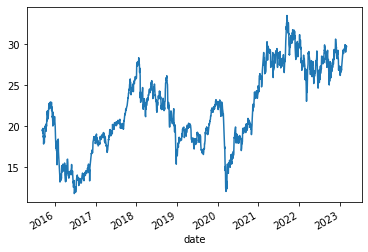

股票代號 1503


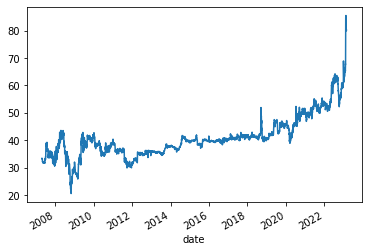

股票代號 1783


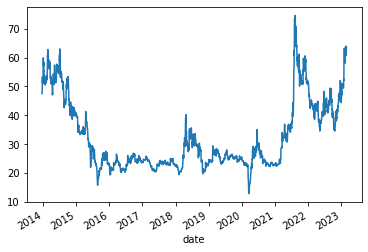

股票代號 2301


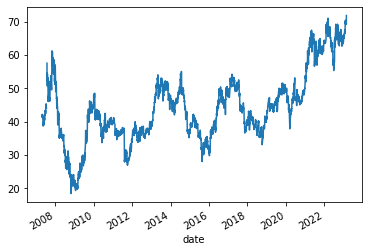

股票代號 2493


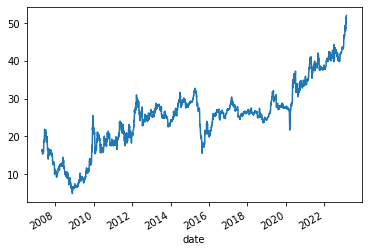

股票代號 2748


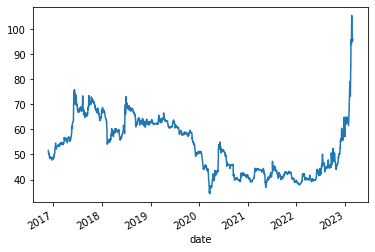

股票代號 3023


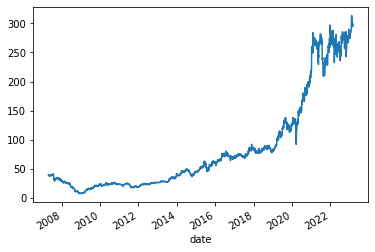

股票代號 3231


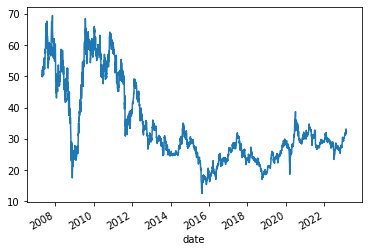

股票代號 3443


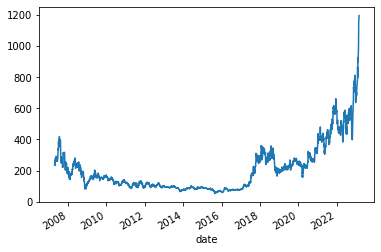

股票代號 3652


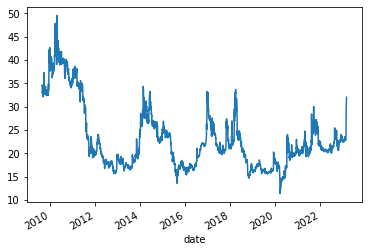

股票代號 4153


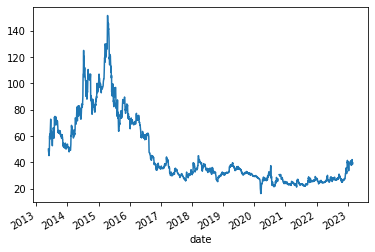

股票代號 4545


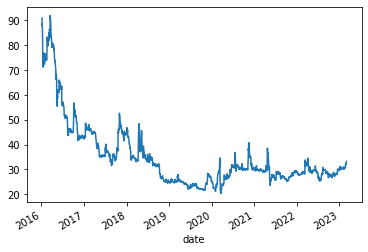

股票代號 4979


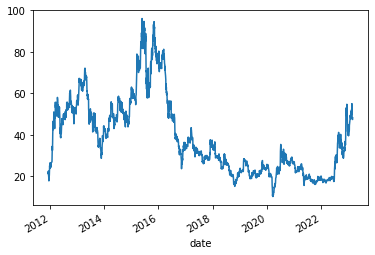

股票代號 5425


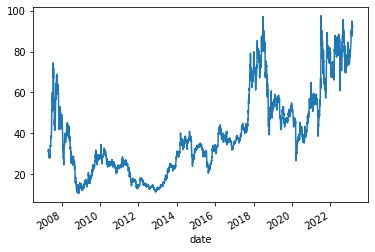

股票代號 6142


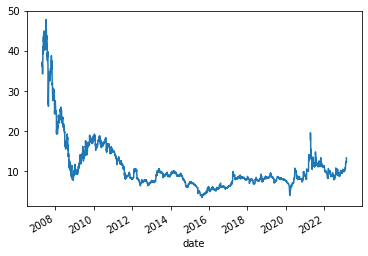

股票代號 6234


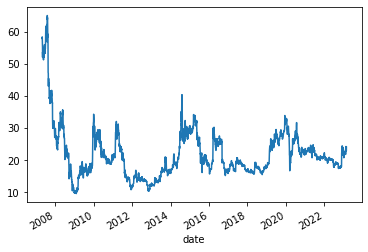

股票代號 6469


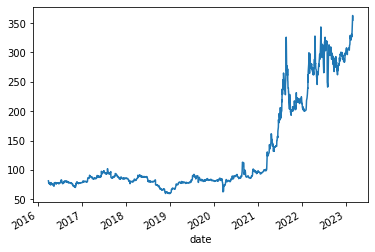

股票代號 6605


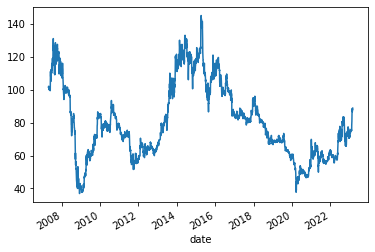

股票代號 8049


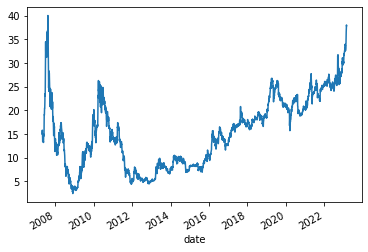

股票代號 8401


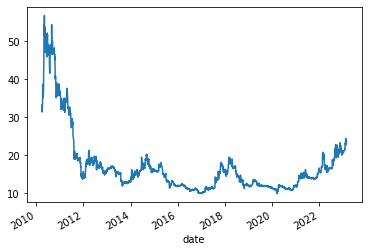

股票代號 8938


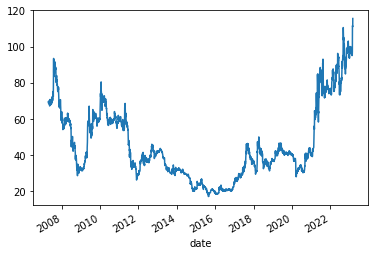

In [ ]:
import matplotlib.pyplot as plt

latest_scores = scores.iloc[-1]
for s in latest_scores[latest_scores == 8].index[::10]:
  print('股票代號', s)
  close[s].plot()
  plt.show()

# 分析趨勢樣版的上漲時間區間

In [ ]:
#(scores == 8)
adj = data.get('etl:adj_close')


ret = {}
for n in range(5, 120, 10):
  print(n)
  mean = (adj.shift(-n) / adj.shift(-1)).unstack().mean()
  ret[n] = (adj.shift(-n) / adj.shift(-1))[scores == 8].unstack().mean() - mean

5
15
25
35
45
55
65
75
85
95
105
115


In [ ]:
import pandas as pd

pd.options.plotting.backend = "plotly"
pd.Series(ret).plot()

In [ ]:
from finlab import backtest

r = backtest.sim((scores == 8)['2009':], resample='Q')
r.display()

00640L    0.005102
1336      0.005102
1339      0.005102
1342      0.005102
1432      0.005102
            ...   
8940      0.005102
8996      0.005102
9902      0.005102
9939      0.005102
9942      0.005102
Name: 2023-03-31 00:00:00, Length: 196, dtype: float64

Timestamp('2023-03-31 00:00:00')